## APS Failure at Scania Trucks Data Set: Predicting if a Truck needs Servicing
The data can be downloaded from http://archive.ics.uci.edu/ml/datasets/IDA2016Challenge

**Resultant files of this notebook are included in:**
- ScaniaDataset/imputation => after applying median imputation
- ScaniaDataset/dimReduction => After appling PCA with 3 PCA components on imputed data files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/your-folder

/content/drive/MyDrive/training


In [ ]:
import pandas as pd
import numpy as np
import os
from pprint import pprint

# to display fully (non-truncated) data-frame
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('display.max_colwidth', -1)

#Setup to show all results in jupiter not only the last one:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # revert to 'last_expr' to get only last results

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
from pprint import pprint

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (20,20)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)

## Read training and testing files
**Note:** skip first 20 rows in these files because it includes only some descriptions. The data rows start at row 21

In [ ]:
data_dir ="ScaniaDataset/"
df_train = pd.read_csv(data_dir+"aps_failure_training_set.csv", skiprows=20)
df_test =  pd.read_csv(data_dir+"aps_failure_test_set.csv", skiprows=20)

In [ ]:
df_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

In [ ]:
df_train.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [ ]:
df_train['class'].unique()

array(['neg', 'pos'], dtype=object)

In [ ]:
df_train['class'].value_counts()

,count
class,
neg,59000
pos,1000


**Note:**
- Pos = 1 (Minroity Class)
- Neg = 0 (Majority Class)

### Replace neg with 0 and pos with 1 in training and testing datasets

In [ ]:
df_train['class'] = df_train['class'].map({'neg': 0, 'pos': 1})
df_test['class'] = df_test['class'].map({'neg': 0, 'pos': 1})

---------------------------------------------------------------------------------------------------------

## Check how the data is balancing/imbalancing - Plot % and no of rows for each classes/labels

In [ ]:
import matplotlib.ticker as ticker
def plot_frequency(df, col='class', title="Training dataset"):
    fig, axes = plt.subplots(1,1,figsize=[7,5], dpi= 100)


    ax = sns.countplot(x=col, data=df, ax=axes);
    plt.xlabel(col)
    plt.title(title)
    #plt.legend(labels=["No failure","failure"])
    ax.set_xticklabels(["No failure","failure"])



    # Make twin axis
    ax2=ax.twinx()
    ncount = len(df)

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid()
    #ax.legend(['No failure','failure'])

    #plt.show()
    #plt.tight_layout()

<ipython-input-12-c73547e73c22>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No failure","failure"])


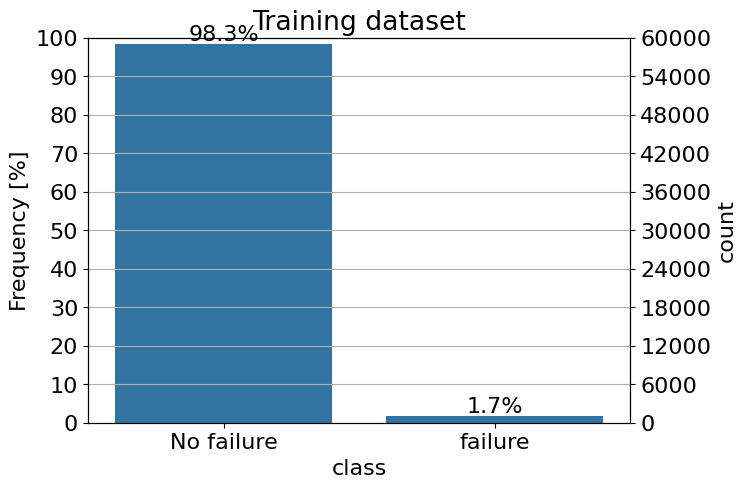

In [ ]:
len(df_train)
df_train['class'].value_counts()
plot_frequency(df_train);

16000

,count
class,
0,15625
1,375


<ipython-input-12-c73547e73c22>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No failure","failure"])


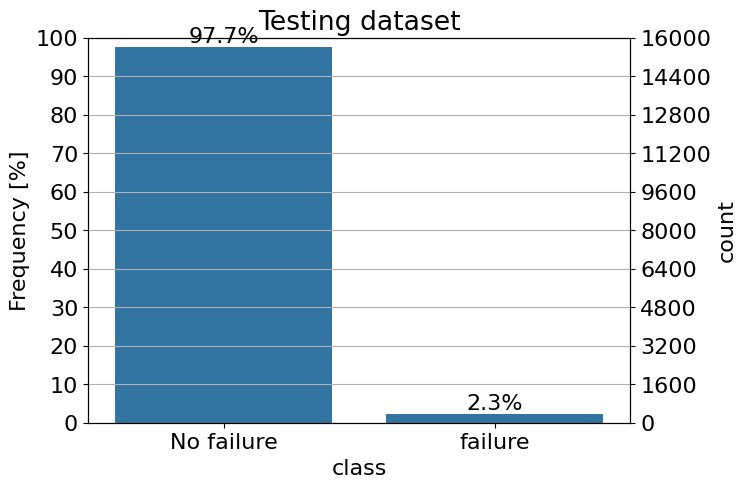

In [ ]:
len(df_test)
df_test['class'].value_counts()
plot_frequency(df_test, title="Testing dataset")

---------------------------------------------------------------------------------------------------

### Replace all na in the dataset with np.NaN values

In [ ]:
df_train = df_train.replace('na', np.nan)
df_test = df_test.replace('na', np.nan)

------------------------------------------------------------------------------------------------------------------------------------------------

## Plot how many rows are nan per columns
**Note:**
- "Max % of nan values in columns regardless their class label (pos/neg)" = 82% in both trainning and testing

#### Plot how many rows are nan per columns

In [ ]:
def percentage_nan_colums(df, title="Training dataset"):
    plt.figure(figsize=(35,12))
    train = (df.isnull().sum()/len(df)*100)
    plt.bar(list(train.keys()), list(train.values), color='b')
    print("Max % of nan values in columns regardless their class label (pos/neg)", max(list(train.values)))
    plt.xticks([])
    plt.xlabel("Columns of the Dataset",size=25)
    plt.ylabel("Percentage of Nan values (%)",size = 25)
    plt.title(title+": Histogram for % of Nan values for each column",size =25)
    #plt.legend(['Negative Class','Positive Class'])
    plt.show()
    pass;


Max % of nan values in columns regardless their class label (pos/neg) 82.10666666666665


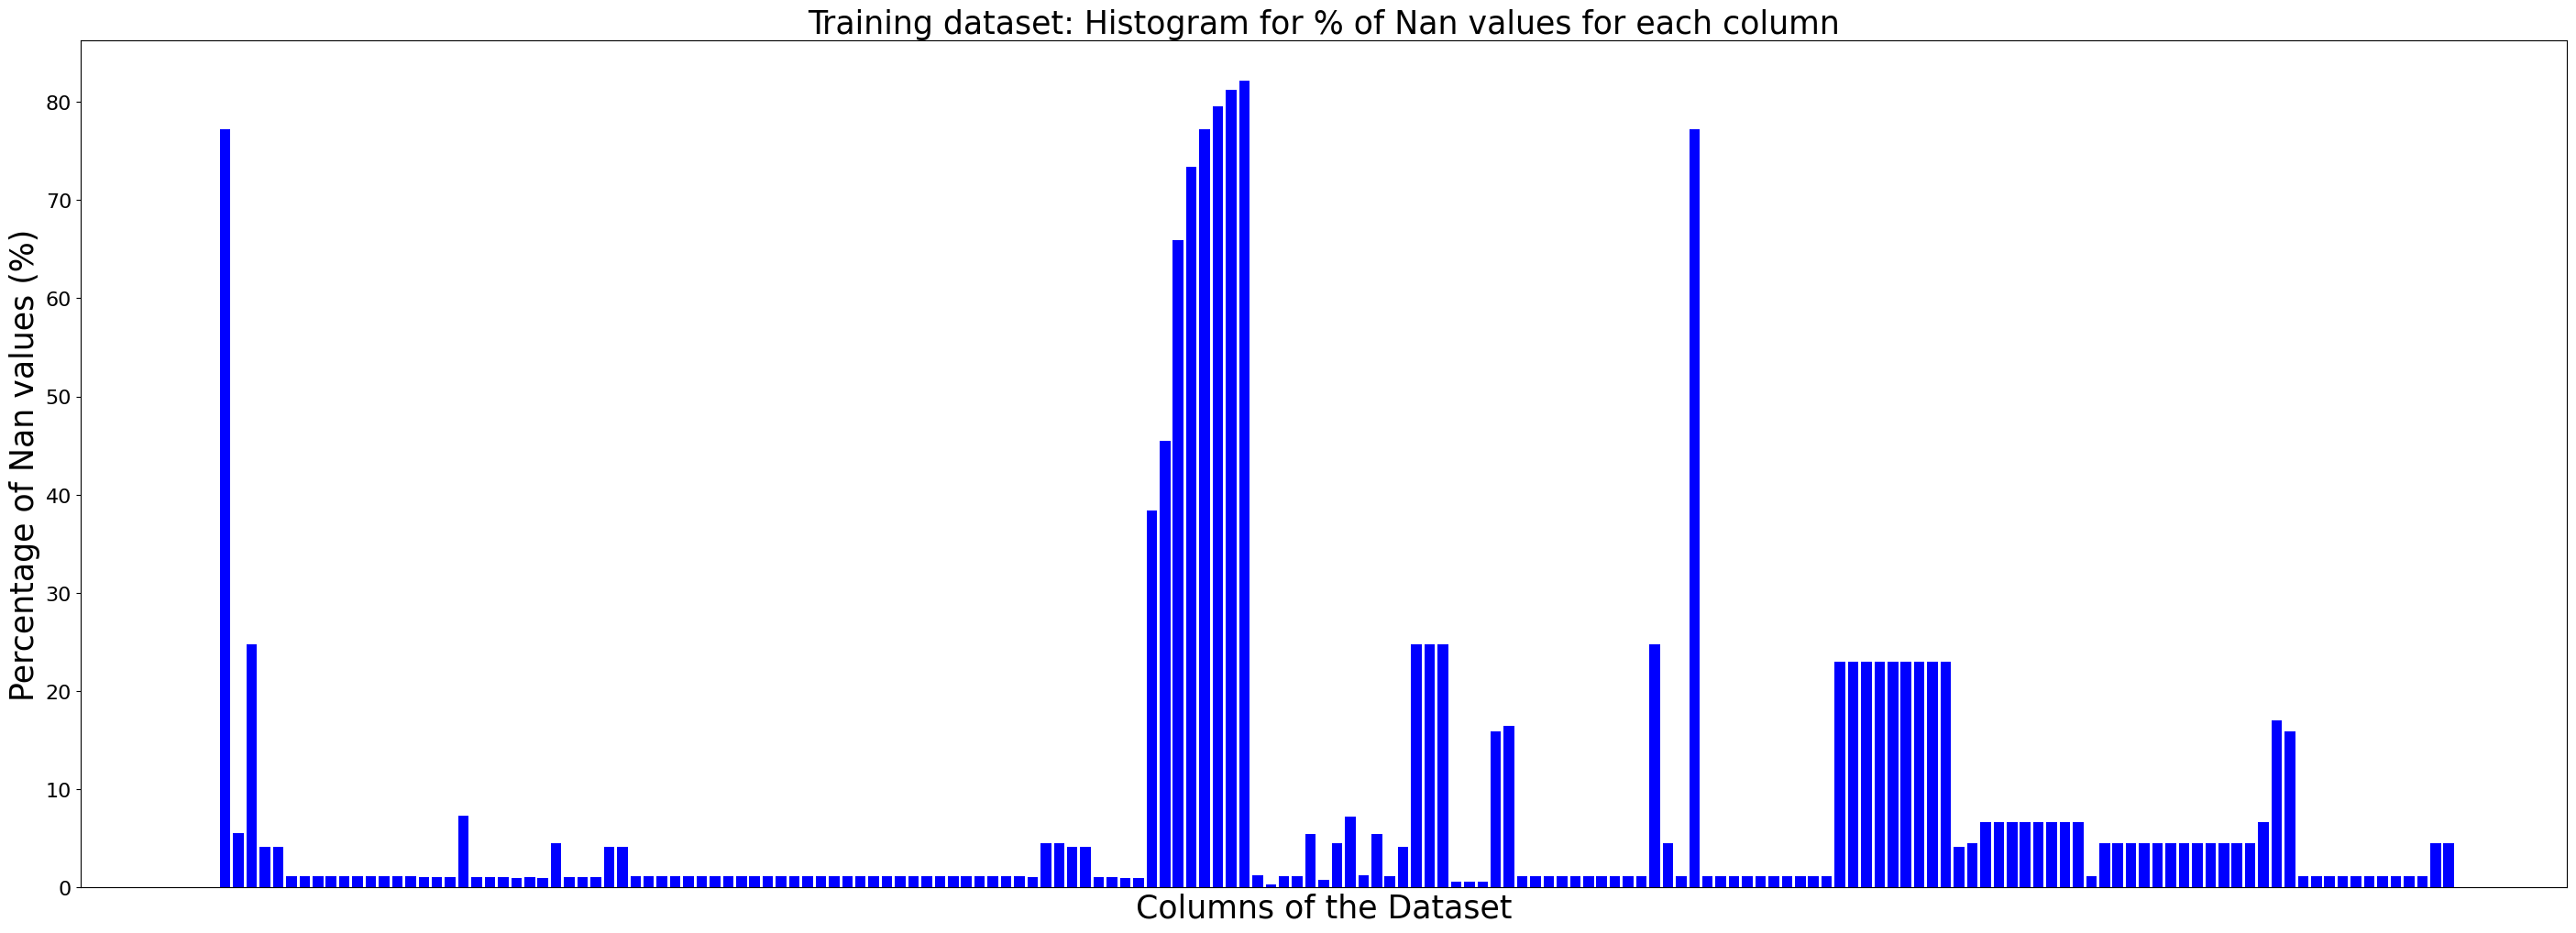

In [ ]:
percentage_nan_colums(df_train, title="Training dataset")

Max % of nan values in columns regardless their class label (pos/neg) 82.05624999999999


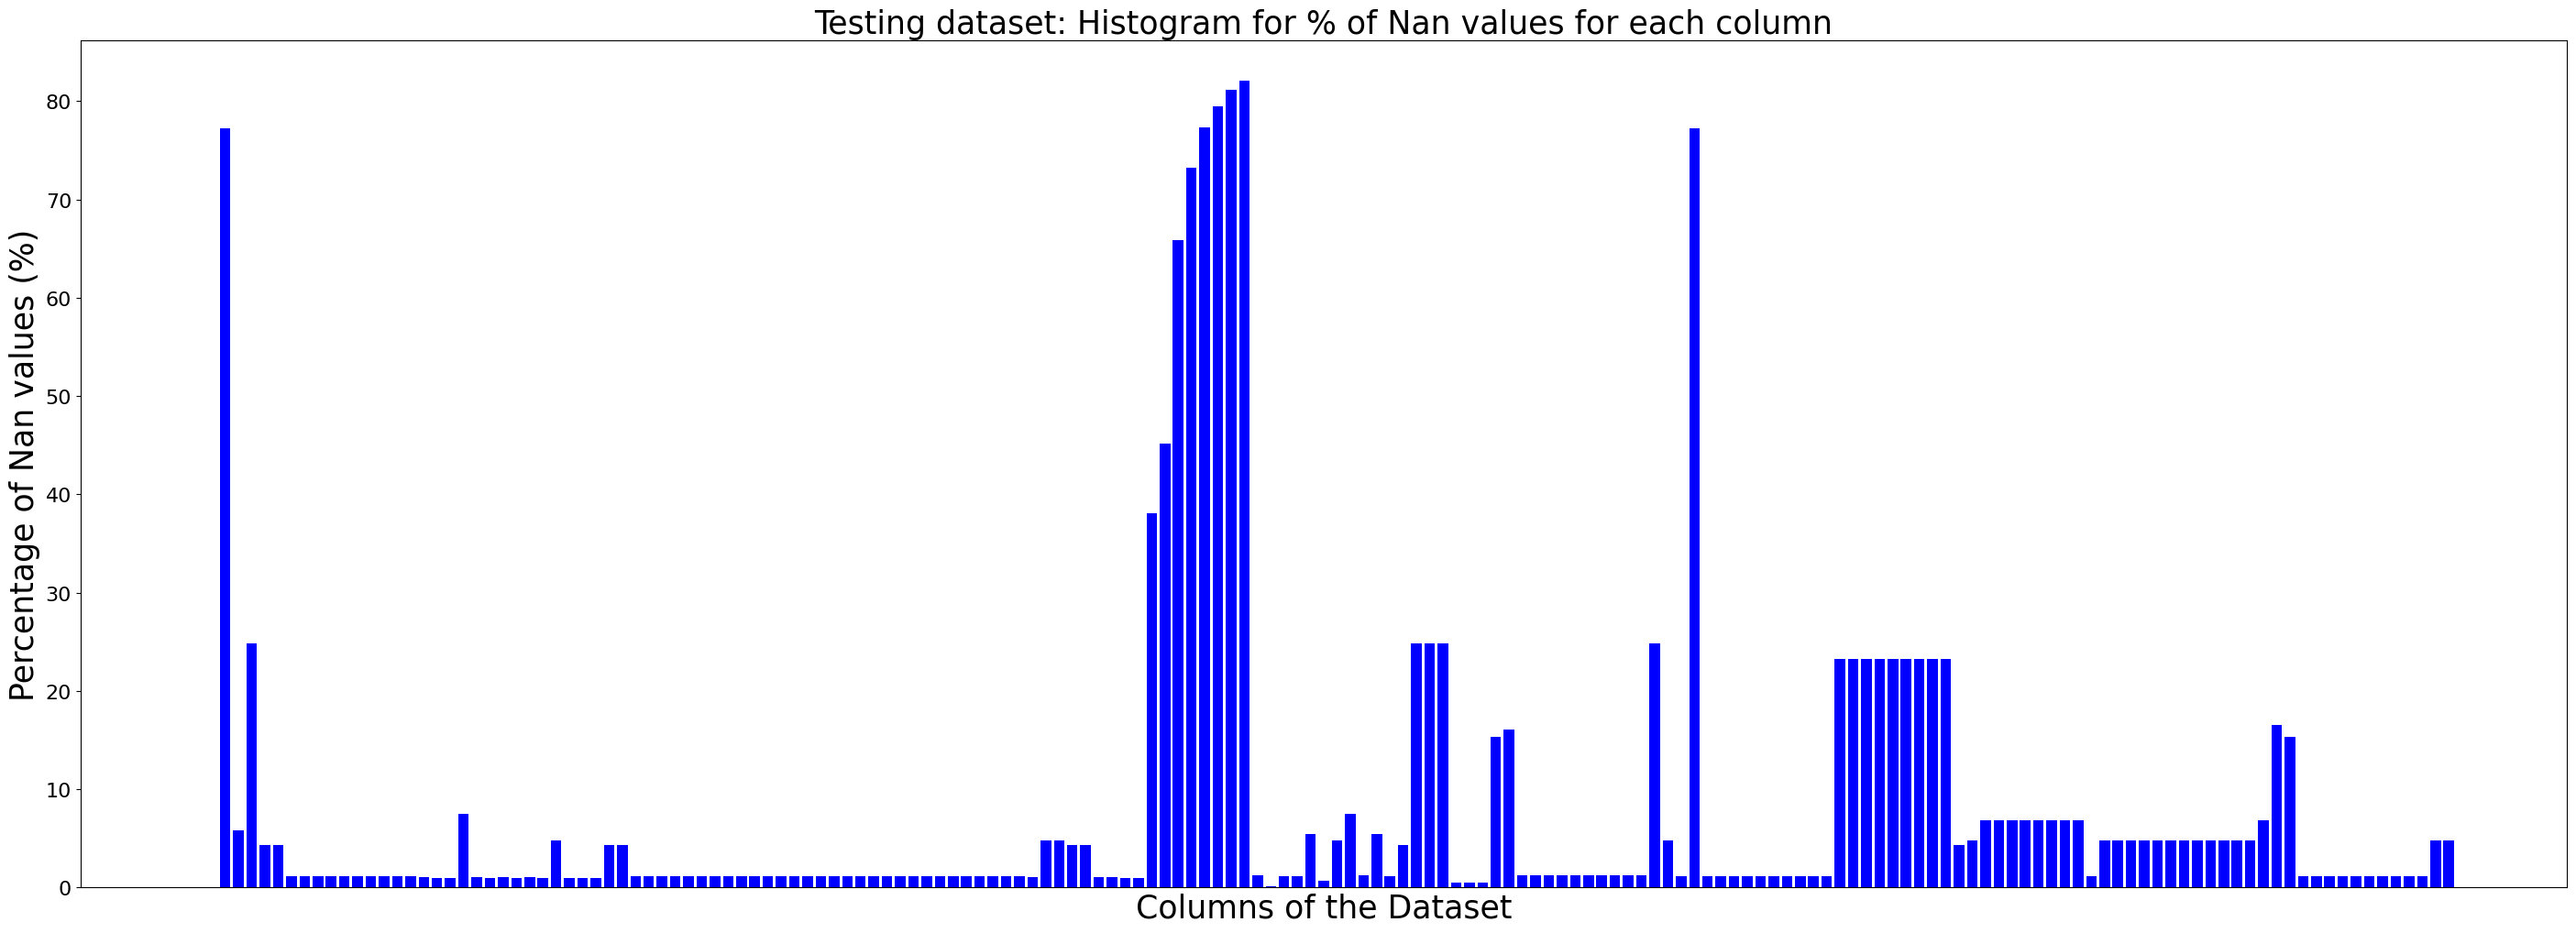

In [ ]:
percentage_nan_colums(df_test, title="Testing dataset")

------------------------------------------------------------------------------------------------------------------------------

## Plot how many positive and negative rows are nan per columns
Note from below exploratoins

**Training:**
- Max % of nan values in columns that represent pos (minority) class=  77.10000000000001
- Max % of nan values in columns that represent neg (majority) class=  83.3457627118644
- This percentage isn't with respect to the total length of the data, but instead with respect to the total length of represented class; total length of pos/neg - thats why the max % of nan in the previous cell

**Testing:**
- Max % of nan values in columns that represent pos (minority) class=  77.60000000000001
- Max % of nan values in columns that represent neg (majority) class=  83.8592
- This percentage isn't with respect to the total length of the data, but instead with respect to the total length of represented class; total length of pos/neg - thats why the max % of nan in the previous cell

In [ ]:
def percentage_nan_colums_pos_neg(df, title="Training dataset"):
    positive_rows = df.loc[df['class']==1]  # extracting all the rows having positive class
    negative_rows = df.loc[df['class']==0]  # extracting all the rows having negative class
    # drop class column
    pos = positive_rows.drop(['class'],axis=1)
    neg = negative_rows.drop(['class'],axis=1)

    plt.figure(figsize=(35,12))
    pos_nan = (pos.isnull().sum()/len(pos) * 100)
    neg_nan = (neg.isnull().sum()/len(neg) * 100)

    print("Max % of nan values in columns that represent pos (minority) class= ", max(pos_nan))
    print("Max % of nan values in columns that represent neg (majority) class= ", max(neg_nan))

    plt.bar(list(neg_nan.keys()), list(neg_nan.values), color='r')
    plt.bar(list(pos_nan.keys()), list(pos_nan.values), color='b')


    plt.xticks([])
    plt.xlabel("Columns of the Dataset",size=25)
    plt.ylabel("Percentage of Nan values (%)",size = 25)
    plt.title(title+" - Histogram for % of Nan values for each column",size =25)
    plt.legend(['Negative Class', 'Positive Class'])
    plt.show()
    pass;


Max % of nan values in columns that represent pos (minority) class=  77.10000000000001
Max % of nan values in columns that represent neg (majority) class=  83.3457627118644


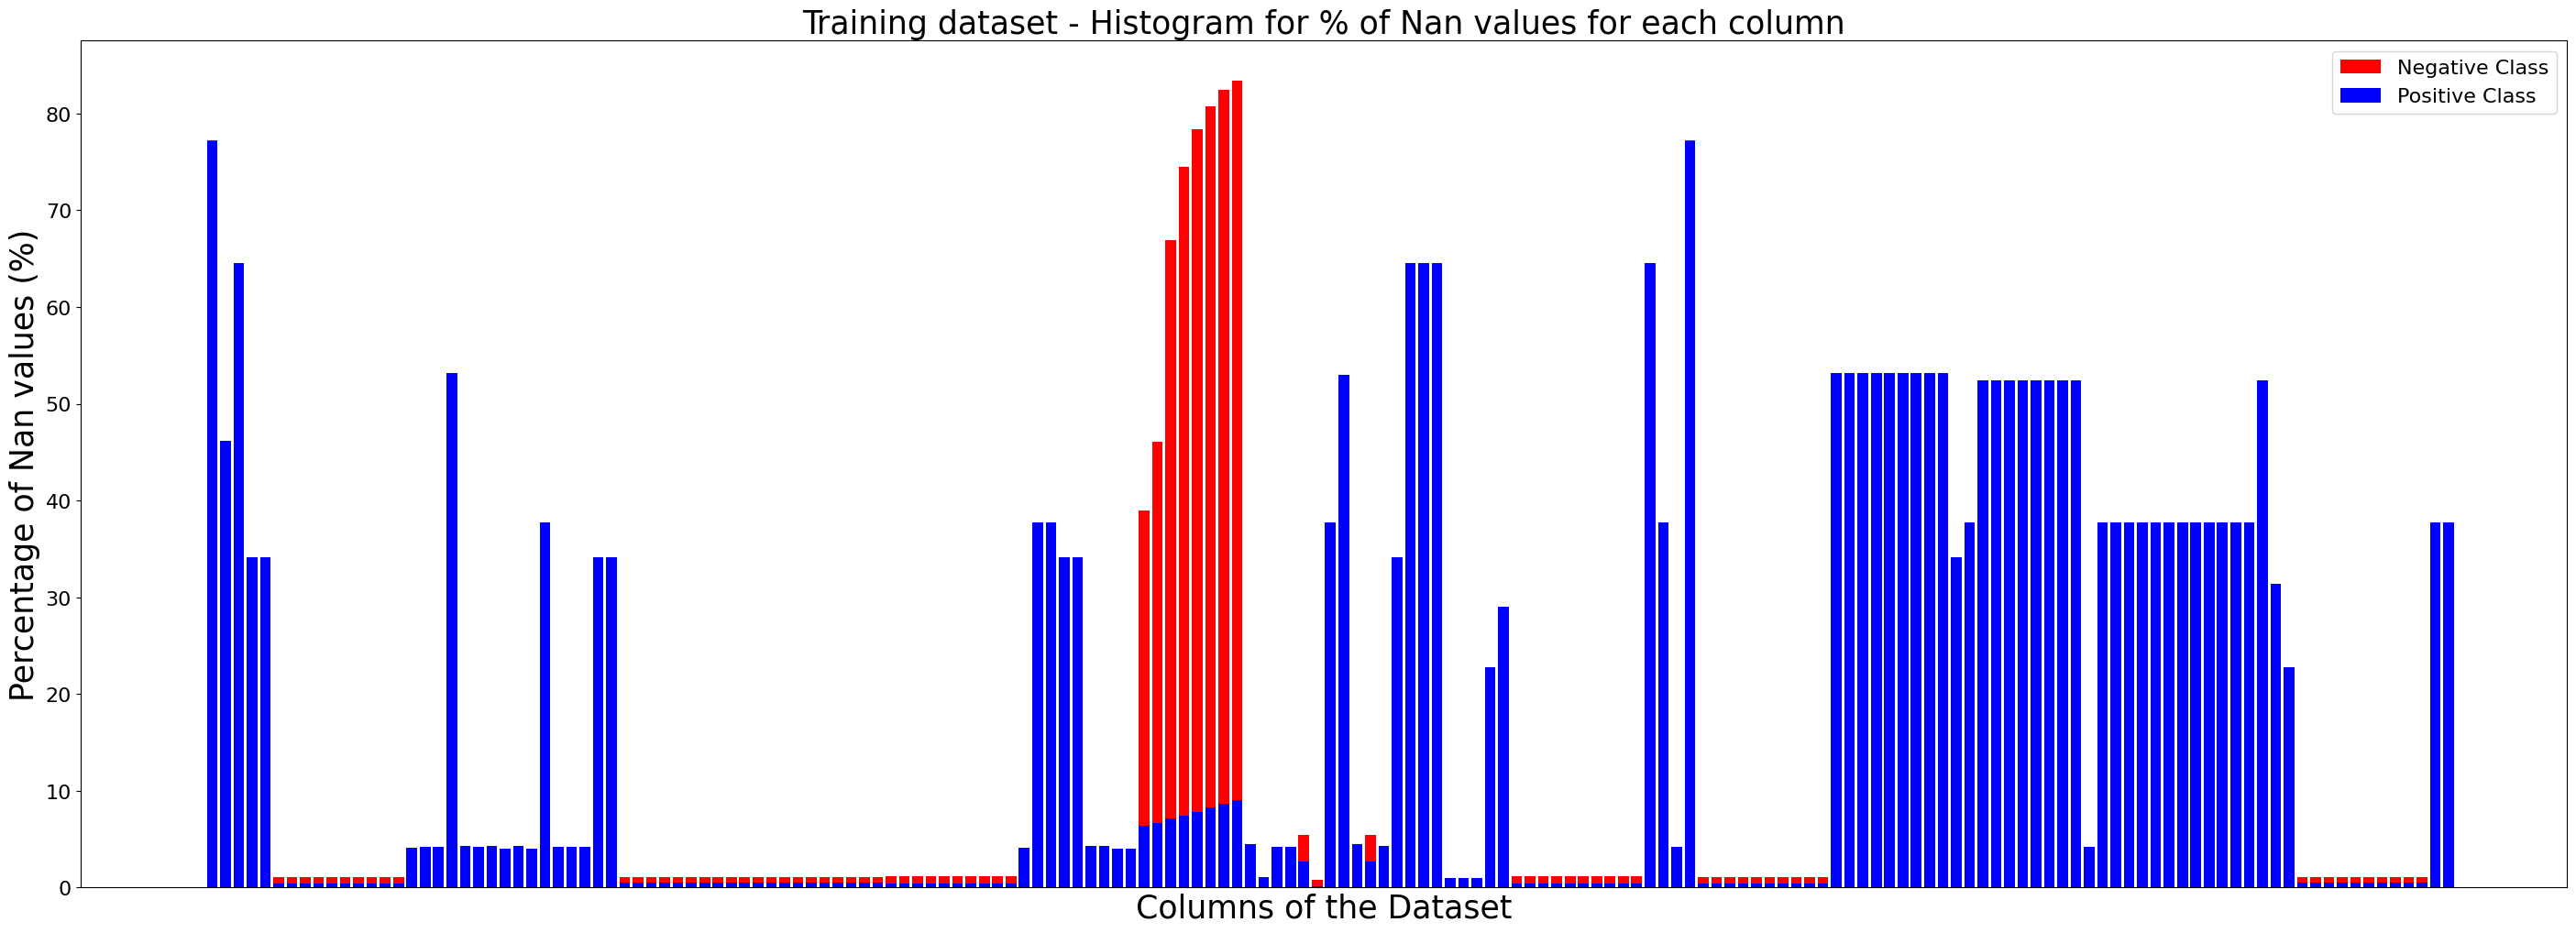

In [ ]:
percentage_nan_colums_pos_neg(df_train, title="Training dataset")

Max % of nan values in columns that represent pos (minority) class=  77.60000000000001
Max % of nan values in columns that represent neg (majority) class=  83.8592


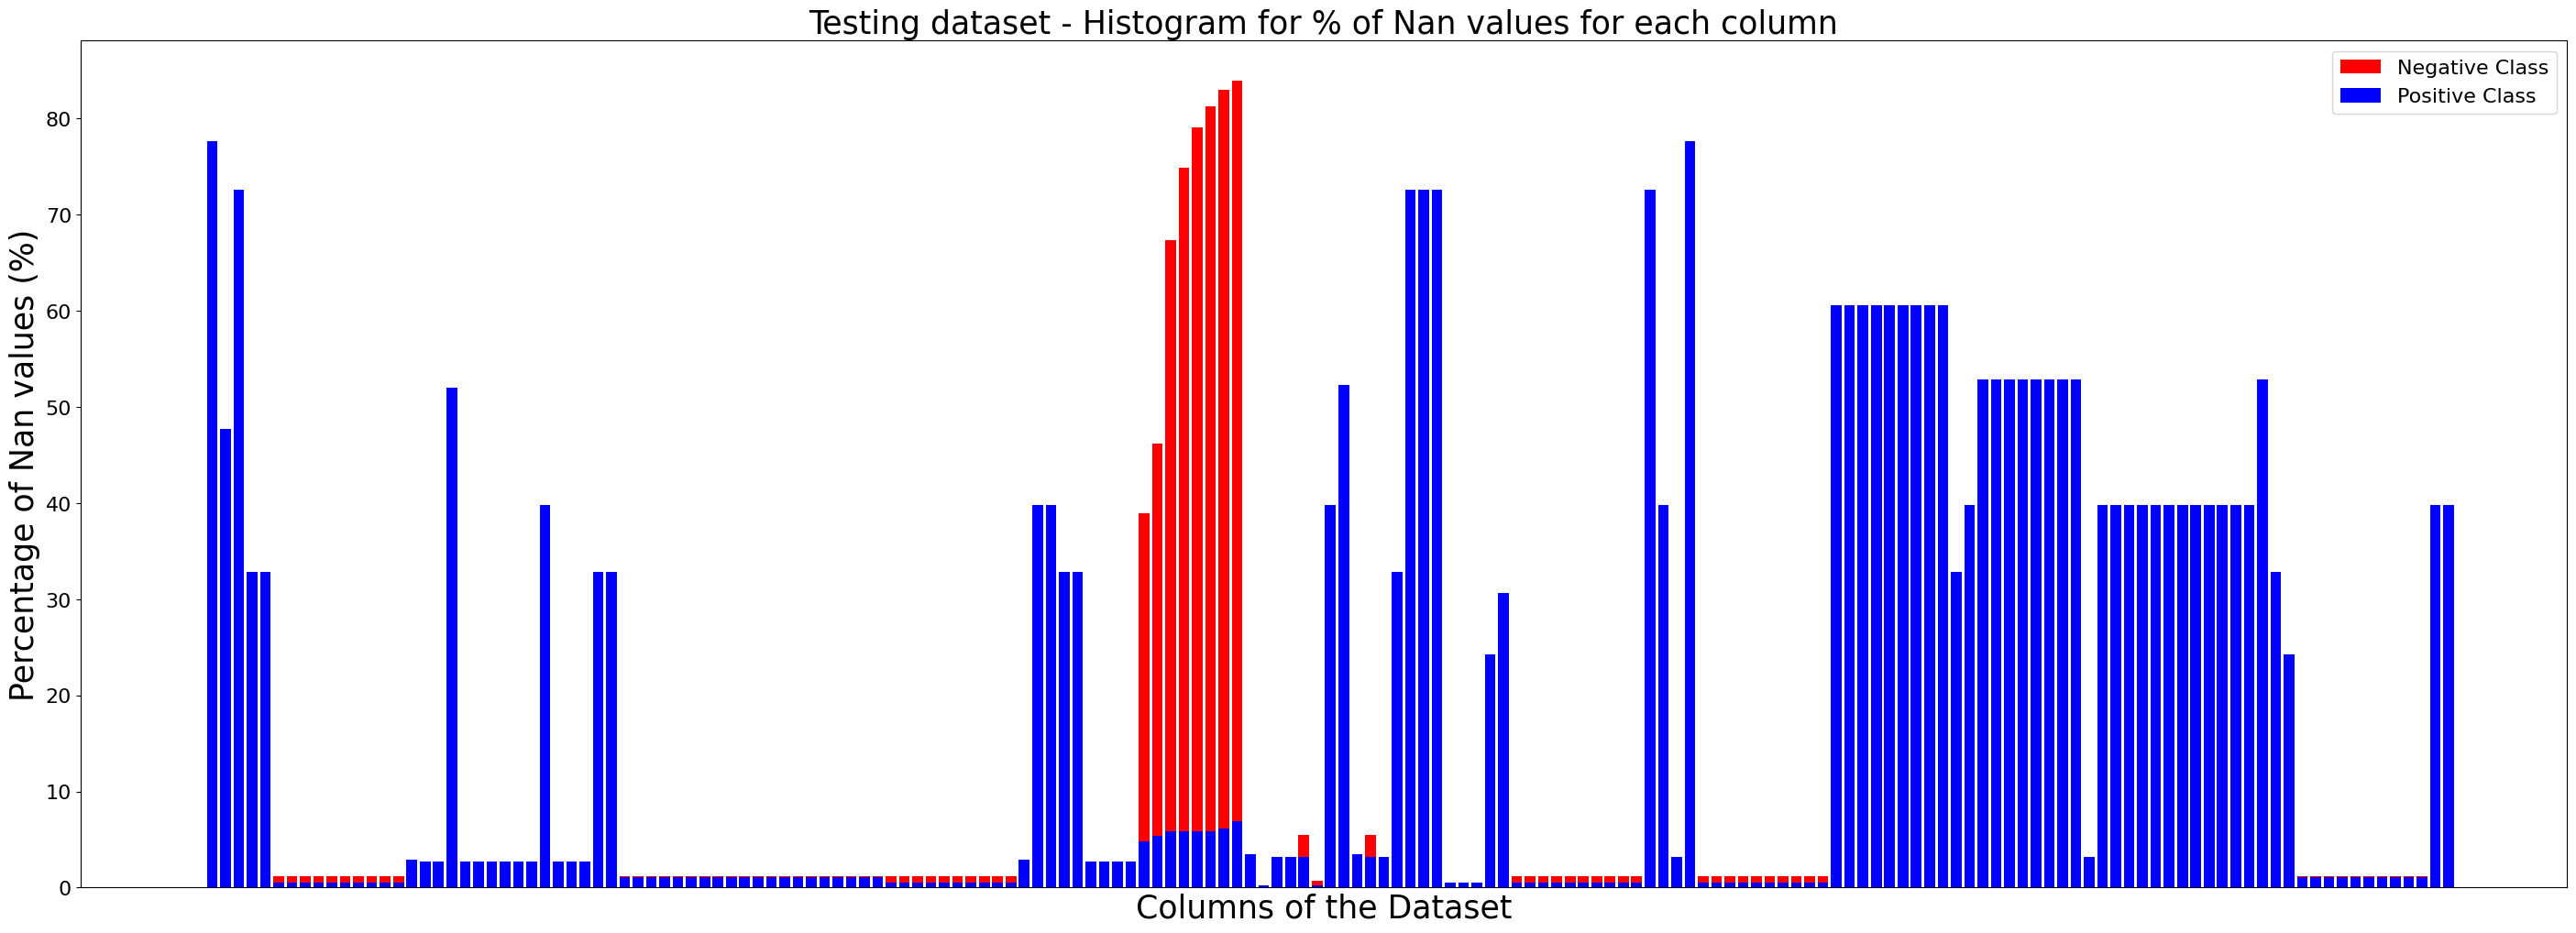

In [ ]:
percentage_nan_colums_pos_neg(df_test, title="Testing dataset")

In [ ]:
len(df_train)
len(df_train.columns)
df_train.head()

60000

171

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,21614,21614,

In [ ]:
len(df_test)
len(df_test.columns)
df_test.head()

16000

171

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,NaN,NaN,NaN,NaN,NaN,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,NaN,NaN,NaN,NaN,NaN,100120,59816.46,4201350,4201350,4203050,29967.0,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,NaN,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978

----------------------------------------------------------------------------------------------------------------

#### Drop columns with all NaN values

In [ ]:
len(df_train.columns)
df_train = df_train.dropna(axis=1, how='all')
len(df_train.columns)

len(df_test.columns)
df_test = df_test.dropna(axis=1, how='all')
len(df_test.columns)

171

171

171

171

------

### Normalising and Fill the missig values

In [ ]:
y_test = df_test['class']
df_test = df_test.drop(['class'], axis = 1)

y_train = df_train['class']
df_train = df_train.drop(['class'], axis = 1)

In [ ]:
#sc = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(df_train)
X_test = sc.transform(df_test)


In [ ]:
#Imputing Missing Values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # median
imputer.fit(X_train)
df_train_imp = pd.DataFrame(imputer.transform(X_train), columns=df_train.columns)
df_test_imp = pd.DataFrame(imputer.transform(X_test), columns=df_test.columns)


SimpleImputer()

In [ ]:
df_train.columns

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'], dtype='object', length=170)

### Export data

In [ ]:
imp_dir = "ScaniaDataset/"

df_train_imp['class'] = y_train
df_train_imp.to_csv(imp_dir + "imp_aps_mean_failure_training_set.csv", index = False)
df_train_imp.head()0

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,0.027925,0.003496,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,0.007996,0.038972,0.015907,0.001463,0.0,0.034368,0.0,0.000000,0.0,0.000000,0.00000,0.035022,0.029911,0.022660,0.044285,0.0,0.0,0.0,0.0,0.001274,0.002297,0.0,0.0,0.0,0.0,0.000000,0.003754,0.033205,0.001436,0.007229,0.0,0.000531,0.000465,2.893584e-04,0.000271,5.000101e-03,0.011813,3.681733e-05,1.021497e-07,0.0,0.0,0.010000,0.008791,0.007444,0.007777,0.012332,0.035479,0.058892,0.000250,0.000000,0.000000,0.034739,0.000000,0.000033,0.000133,0.000979,0.034368,0.030469,0.021086,0.017480,0.252354,0.269627,0.228244,0.232853,0.216434,0.420683,0.444702,0.461499,0.172130,0.027925,0.034739,0.034739,0.035415,0.043479,0.001693,0.446972,0.527780,0.041502,0.0,0.050171,2.329835e-10,0.004486,0.000000,0.037208,0.0,0.016536,0.000046,0.026223,0.0,0.000000,0.000000e+00,0.001244,0.007709,0.027562,0.019164,0.002982,0.001486,4.417780e-05,2.562819e-08,0.000484,0.034739,0.000645,0.012483,0.002794,5.815179e-03,0.012301,0.005728,0.010592,0.012140,0.002044,0.000074,0.0,0.000584,0.001000,0.050517,0.001163,0.000000,2.780107e-02,0.000000,0.001868,0.044143,0.010630,0.006391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021296,0.045829,0.094192,0.000000e+00,0.000000,0.040779,0.057779,0.032041,0.014773,0.000000,0.000000,0.0,0.0,0.002118,0.023069,0.032751,0.012881,0.017378,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000,0
1,0.012036,0.003496,0.000000e+00,2.220573e-05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,0.003646,0.018302,0.008157,0.001787,0.0,0.018766,0.0,0.000012,0.0,0.000000,0.00000,0.018180,0.017407,0.013917,0.013244,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000572,0.006052,0.004078,0.000952,0.0,0.000725,0.001724,9.689357e-04,0.000287,8.208840e-03,0.004005,2.279950e-04,1.532245e-07,0.0,0.0,0.005920,0.003845,0.003575,0.004178,0.005457,0.007219,0.008733,0.016044,0.002785,0.000108,0.018907,0.000217,0.001481,0.000449,0.006856,0.018766,0.015318,0.015317,0.008575,0.260487,0.274495,0.279667,0.353789,0.391507,0.420683,0.444702,0.461499,0.006459,0.012036,0.018907,0.018907,0.019221,0.017698,0.006416,0.955934,0.005705,0.019802,0.0,0.000000,2.215927e-05,0.004277,0.000222,0.016250,0.0,0.011610,0.000000,0.000000,0.0,0.000000,6.494771e-07,0.001039,0.006944,0.010922,0.004667,0.001095,0.000688,1.538530e-06,2.219349e-05,0.000000,0.018907,0.000645,0.007340,0.001814,3.577230e-03,0.008252,0.003646,0.004847,0.004085,0.000710,0.000014,0.0,0.000823,0.001667,0.023635,0.007970,0.000294,1.011367e-03,0.000352,0.001392,0.018224,0.007440,0.002963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011535,0.019709,0.017052,0.000000e+00,0.000000,0.020787,0.024761,0.009800,0.006837,0.000000,0.000000,0.0,0.0,0.002630,0.020862,0.028186,0.008862,0.008391,0.005407,0.004716,3.019031e-03,4.272

In [ ]:
df_test_imp['class'] = y_test

df_test_imp.to_csv(imp_dir + "imp_aps_mean_failure_test_set.csv", index = False)
df_test_imp.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,class
0,0.000022,0.000000,9.386557e-09,1.397901e-09,0.0,0.0,0.0,0.0,0.0,0.000042,2.069654e-05,0.000022,0.000020,0.000000,0.000000,0.000000,0.000054,0.0,0.000000,0.0,0.000044,0.000042,0.000082,0.000078,0.001428,0.000018,0.0,0.0,0.000000,0.0,0.000073,0.000223,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000126,1.062436e-07,0.000193,0.000096,0.000005,0.000004,0.000002,0.000013,1.777389e-05,0.000075,0.000001,0.0,0.000038,0.000022,0.000009,0.000010,0.000008,0.000027,0.000005,0.000005,0.000002,0.000000,0.000645,0.000010,0.000020,0.000005,0.000000,0.000054,0.000099,0.002396,0.000076,0.213954,0.245177,0.304878,0.353789,0.391507,0.420683,0.444702,0.461499,0.106995,0.000022,0.000645,0.000645,0.000992,0.000054,0.000017,0.101243,0.102421,0.000089,0.0,0.000122,0.000000e+00,0.000280,0.0,0.000042,0.000000,0.000106,0.000046,0.000409,0.0,1.378075e-07,9.420836e-05,0.000049,0.000008,0.000013,5.271890e-07,1.206865e-07,0.000000,0.000000,9.319341e-10,0.000024,0.000645,0.000000,0.001847,0.000032,7.811493e-07,6.128916e-07,0.000012,0.000001,0.000104,0.000178,0.000130,0.0,0.000024,0.000057,0.000065,0.000029,0.000000,0.000000e+00,0.0,0.000000,0.000055,0.000157,0.000636,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000116,0.000000,0.000000,1.731773e-07,0.000011,0.000047,0.000101,0.000002,0.000007,0.000000,0.000001,0.0,0.0,0.000000,0.004391,0.001087,0.000100,0.000032,0.000014,0.000004,0.000004,0.000011,0.000002,7.359084e-07,0.000000,0.000000,0.0,0.0,0
1,0.000030,0.000000,3.191429e-08,4.659671e-09,0.0,0.0,0.0,0.0,0.0,0.000000,3.268794e-06,0.000070,0.000039,0.000000,0.000000,0.000000,0.000071,0.0,0.000011,0.0,0.000000,0.000000,0.000165,0.000149,0.000304,0.000050,0.0,0.0,0.000000,0.0,0.000015,0.000703,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000001,0.000156,0.000000e+00,0.000028,0.000010,0.000004,0.000028,0.000007,0.000007,1.718865e-04,0.000000,0.000000,0.0,0.000054,0.000015,0.000011,0.000007,0.000007,0.000007,0.000043,0.000022,0.000006,0.000003,0.000243,0.000010,0.000007,0.000047,0.000000,0.000071,0.000112,0.000457,0.000069,0.213954,0.245177,0.304878,0.353789,0.391507,0.420683,0.444702,0.461499,0.022483,0.000030,0.000243,0.000243,0.000258,0.000068,0.000000,0.037088,0.038428,0.000115,0.0,0.000148,2.329835e-10,0.000187,0.0,0.000051,0.000000,0.000140,0.000000,0.000572,0.0,0.000000e+00,6.836601e-08,0.000074,0.000036,0.000021,1.728625e-05,3.620594e-07,0.000000,0.000000,1.630885e-09,0.000109,0.000243,0.000000,0.002624,0.000064,2.473639e-06,8.250464e-06,0.000009,0.000005,0.000130,0.000169,0.000050,0.0,0.000088,0.000281,0.000096,0.000033,0.000000,0.000000e+00,0.0,0.000000,0.000066,0.000175,0.000227,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.000120,0.000000,0.000000,6.291058e-07,0.000012,0.000040,0.000094,0.000082,0.000030,0.000056,0.000009,0.0,0.0,0.000000,0.000027,0.001232,0.000134,0.00003

## Visualizing


#### Using PCA to reduce dim

In [ ]:
np.random.seed(42)
random_state = 42
df_train_vis = df_train_imp.copy(deep=True)
df_test_vis = df_test_imp.copy(deep=True)
rndperm = np.random.permutation(df_train_vis.shape[0])

#drop class/label from the data
train_y_vis = df_train_vis['class']
df_train_vis = df_train_vis.drop(['class'], axis = 1)

test_y_vis = df_test_vis['class']
df_test_vis = df_test_vis.drop(['class'], axis = 1)

- **Using only 3 PCA Componenets already represent 74% of the data variance**
- **Using only 11 PCA Componenets already represent 94 - 95% of the data variance**

In [ ]:
# pca = PCA(n_components = 3)
#pca = PCA(n_components = 11)
pca = PCA(0.99, random_state=random_state)

pca.fit(df_train_vis.values)
# pca.fit(df_test_vis.values)

pca_result_train = pca.transform(df_train_vis.values)
pca_result_test = pca.transform(df_test_vis.values)

# to be used in the visualisation below
#df_train_vis_pca = pd.DataFrame()
# df_train_vis_pca_y =df_train_vis['class']

df_train_vis['pca-one'] = pca_result_train[:,0]
df_train_vis['pca-two'] = pca_result_train[:,1]
df_train_vis['pca-three'] = pca_result_train[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained cumulative variation: {}'.format(pca.explained_variance_ratio_.cumsum()))
print(pca.explained_variance_)

print ("Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

# Explained variation per principal component: [0.30597662 0.04944797 0.03777163]
# Explained cumulative variation: [0.30597662 0.35542459 0.39319622]
# [47.51255373  7.67836302  5.8652409 ]

PCA(n_components=0.99, random_state=42)

Explained variation per principal component: [3.35582963e-01 2.43113543e-01 1.92351330e-01 9.17388621e-02
 3.02913824e-02 2.19753601e-02 1.10182553e-02 7.99555387e-03
 7.16639742e-03 5.96442209e-03 5.46243647e-03 3.88991115e-03
 3.56929402e-03 2.72450750e-03 2.50318649e-03 2.33683391e-03
 2.22929500e-03 1.78047836e-03 1.46237191e-03 1.38032566e-03
 1.27113684e-03 1.09619717e-03 1.06409009e-03 1.00654181e-03
 9.44863208e-04 8.66020774e-04 8.06347803e-04 7.65520925e-04
 7.52327527e-04 6.92827754e-04 6.48845273e-04 6.07355719e-04
 5.50982900e-04 5.41713814e-04 4.90285902e-04 4.76181406e-04
 4.55163243e-04 4.42589281e-04 4.36894007e-04 3.83477456e-04
 3.64687119e-04 3.48269068e-04 3.47216353e-04 3.34697413e-04]
Explained cumulative variation: [0.33558296 0.57869651 0.77104784 0.8627867  0.89307808 0.91505344
 0.9260717  0.93406725 0.94123365 0.94719807 0.9526605  0.95655042
 0.96011971 0.96284422 0.9653474  0.96768424 0.96991353 0.97169401
 0.97315638 0.97453671 0.97580785 0.97690404 0.977

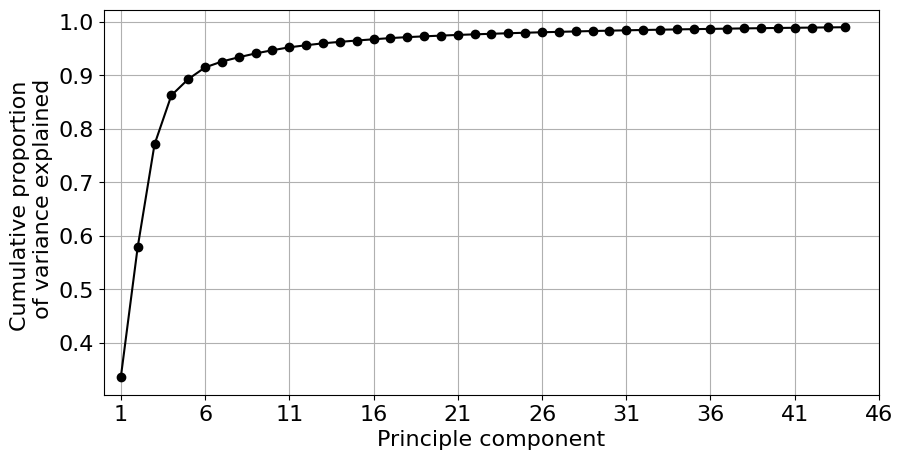

In [ ]:
# plt.plot(pca.explained_variance_ratio_)
n_compnents= pca.n_components_ + 1

fig = plt.figure(figsize=(10,5))
#plt.plot(range(1,45), pca.explained_variance_ratio_, 'o-', color='black');
plt.plot(range(1,n_compnents), pca.explained_variance_ratio_.cumsum(), 'o-', color='black');
plt.grid()
plt.xlim([0, n_compnents])
plt.xticks(np.arange(1, n_compnents+5, 5))
plt.xlabel("Principle component")
plt.ylabel("Cumulative proportion \n of variance explained")
#plt.savefig("Results/PCAs")
pass;

In [ ]:
pd.DataFrame(pca_result_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.357653,0.149168,0.785559,0.107379,0.068720,-0.028512,0.128307,0.002902,0.073669,0.079233,-0.019663,0.029046,0.011850,0.031363,0.035285,-0.004664,-0.001502,-0.022911,0.012911,-0.082526,0.008138,-0.025229,-0.007664,-0.000748,-0.004293,-0.024234,-0.023334,0.014174,-0.004124,-0.019181,-0.008598,0.010591,0.021314,0.005394,-0.000247,-0.002751,-0.009166,-0.012802,-0.004714,-0.002406,-0.003407,-0.001185,-0.006521,-0.002776
1,-0.009868,0.178451,-0.153641,-0.106095,-0.115751,0.677376,0.038713,0.021226,-0.052543,-0.016909,-0.012898,0.003374,-0.028500,0.020769,0.008117,0.005892,0.007906,-0.011153,0.005507,-0.004448,-0.002749,-0.004825,0.001249,0.000996,0.004021,0.001670,0.008042,-0.007237,-0.000055,0.004246,-0.004587,-0.005550,-0.004796,-0.010822,-0.000127,0.005658,-0.000553,-0.001546,0.000319,-0.000134,-0.001348,0.000212,-0.001563,-0.000087
2,0.036263,-0.202770,-0.164386,-0.072079,-0.131766,-0.043973,-0.051563,-0.000143,-0.000497,-0.034116,-0.000904,-0.002220,0.057386,-0.008552,0.000140,-0.016572,-0.009575,-0.010095,0.000070,0.001012,0.002276,-0.003272,-0.003359,0.001175,-0.007394,0.001207,0.002212,0.005100,-0.000914,-0.005770,-0.000296,-0.000551,0.008997,0.005043,0.000289,-0.000591,-0.002613,-0.001610,0.005034,-0.001416,0.001512,0.002922,0.002201,-0.001058
3,0.207965,-0.419020,-0.145090,-0.048601,0.000098,-0.007554,-0.008067,0.004260,-0.006622,0.011792,-0.001259,0.002606,-0.005149,0.005910,-0.005530,0.000864,0.003457,0.004078,-0.002949,0.000050,-0.000538,-0.000886,0.001427,-0.000019,0.002844,-0.000417,-0.000072,-0.001967,-0.000991,-0.000705,0.000519,0.000109,0.000417,0.001277,0.000638,-0.000324,-0.000379,-0.000098,-0.000718,0.000627,-0.000749,0.000203,-0.001044,-0.000886
4,-0.111736,0.259781,-0.174570,-0.061653,0.000418,-0.020208,0.079826,-0.010607,-0.004089,-0.047178,-0.014056,0.007030,-0.037007,0.041515,0.033749,0.030742,0.001147,-0.014362,-0.000690,-0.006554,0.005255,0.001190,0.005673,-0.005022,-0.010242,-0.000186,-0.013388,0.007175,0.005565,0.003734,0.010092,-0.015106,-0.002111,-0.003343,-0.002404,-0.005577,0.003146,-0.004765,-0.018397,-0.005851,0.003766,-0.002192,0.002962,-0.002831


In [ ]:
len(df_train_vis)

60000

### Write PCA output into a new data file

In [ ]:
np.random.seed(42)
random_state = 42
df_train_vis = df_train_imp.copy(deep=True)
df_test_vis = df_test_imp.copy(deep=True)
rndperm = np.random.permutation(df_train_vis.shape[0])

#drop class/label from the data
train_y_vis = df_train_vis['class']
df_train_vis = df_train_vis.drop(['class'], axis = 1)

test_y_vis = df_test_vis['class']
df_test_vis = df_test_vis.drop(['class'], axis = 1)

pca = PCA(n_components = 11)


pca.fit(df_train_vis.values)

pca_result_train = pca.transform(df_train_vis.values)
pca_result_test = pca.transform(df_test_vis.values)

PCA(n_components=11)

In [ ]:
cols = ['pc_'+str(i) for i in range(pca.n_components_)]
dim_dir = "ScaniaDataset/"
df_train_vis_out = pd.DataFrame(pca_result_train, columns=cols)
df_train_vis_out["class"] = train_y_vis

df_train_vis_out.to_csv(dim_dir+"pca_aps_mean_failure_train_set.csv", index = False)
df_train_vis_out.head()


,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,class
0,-0.357653,0.149168,0.785559,0.107379,0.068720,-0.028512,0.128307,0.002902,0.073669,0.079233,-0.019663,0
1,-0.009868,0.178451,-0.153641,-0.106095,-0.115751,0.677376,0.038713,0.021226,-0.052543,-0.016909,-0.012898,0
2,0.036263,-0.202770,-0.164386,-0.072079,-0.131766,-0.043973,-0.051563,-0.000143,-0.000497,-0.034116,-0.000904,0
3,0.207965,-0.419020,-0.145090,-0.048601,0.000098,-0.007554,-0.008067,0.004260,-0.006622,0.011792,-0.001259,0
4,-0.111736,0.259781,-0.174570,-0.061653,0.000418,-0.020208,0.079826,-0.010607,-0.004089,-0.047178,-0.014056,0


In [ ]:
df_test_vis_out = pd.DataFrame(pca_result_test, columns=cols)
df_test_vis_out["class"] = test_y_vis


df_test_vis_out.to_csv(dim_dir+"pca_aps_mean_failure_test_set.csv", index = False)
df_test_vis_out.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,class
0,0.161155,-0.296518,-0.147703,-0.064035,0.017811,-0.017302,0.001606,0.008635,-0.022569,0.004805,-0.000669,0
1,0.197147,-0.390714,-0.145632,-0.052749,0.003007,-0.008112,-0.006774,0.005026,-0.008747,0.010879,-0.000986,0
2,-0.271152,0.611412,-0.183003,-0.143001,0.002290,-0.010953,0.107131,-0.045472,-0.038387,-0.092350,0.044200,0
3,-0.134755,0.120177,-0.180050,-0.094396,-0.112898,-0.045628,0.058169,0.005929,-0.011544,-0.038998,-0.004686,0
4,0.171726,-0.324381,-0.146679,-0.064361,0.004982,-0.002021,-0.007429,0.004521,-0.007393,0.011175,-0.000230,0


**Just to ensure that I still have same class distribution**

In [ ]:
df_test_vis_out["class"].value_counts()
df_train_vis_out["class"].value_counts()

,count
class,
0,15625
1,375


,count
class,
0,59000
1,1000


In [ ]:
df_test_vis_out.columns

Index(['pc_0', 'pc_1', 'pc_2', 'pc_3', 'pc_4', 'pc_5', 'pc_6', 'pc_7', 'pc_8', 'pc_9', 'pc_10', 'class'], dtype='object')